In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:


ratings = pd.read_csv('/content/ratings.dat', sep='::', engine='python',
                      names=['userID', 'movieID', 'rating', 'timestamp'], usecols=[0, 1, 2, 3])
movies = pd.read_csv('/content/movies.dat', sep='::', engine='python',
                     names=['movieID', 'title', 'genres'], usecols=[0, 1, 2], encoding='ISO-8859-1')

ratings['userID'] = ratings['userID'].astype('float32')
ratings['movieID'] = pd.to_numeric(ratings['movieID'], errors='coerce').astype('float32')
ratings['rating'] = ratings['rating'].astype('float32')
movies['movieID'] = movies['movieID'].astype('float32')


movies['genres'] = movies['genres'].str.split('|')

exploded_genres = movies.explode('genres')

movies_encoded = pd.get_dummies(exploded_genres, columns=['genres'], prefix='', prefix_sep='')


movies_encoded = movies_encoded.reset_index(drop=True)


dt = movies_encoded.merge(ratings.dropna(), how='left', on='movieID')


dt['date'] = pd.to_datetime(dt['timestamp'], unit='s')
dt['year'] = dt['date'].dt.year
dt['month'] = dt['date'].dt.month
dt['day'] = dt['date'].dt.day


print(dt.shape)
print(dt.head())


(2102031, 27)
   movieID             title  Action  Adventure  Animation  Children's  \
0      1.0  Toy Story (1995)   False      False       True       False   
1      1.0  Toy Story (1995)   False      False       True       False   
2      1.0  Toy Story (1995)   False      False       True       False   
3      1.0  Toy Story (1995)   False      False       True       False   
4      1.0  Toy Story (1995)   False      False       True       False   

   Comedy  Crime  Documentary  Drama  ...  Thriller    War  Western  userID  \
0   False  False        False  False  ...     False  False    False     1.0   
1   False  False        False  False  ...     False  False    False     6.0   
2   False  False        False  False  ...     False  False    False     8.0   
3   False  False        False  False  ...     False  False    False     9.0   
4   False  False        False  False  ...     False  False    False    10.0   

   rating    timestamp                date    year  month   day  


In [ ]:
print(movies_encoded.dtypes)

movieID        float32
title           object
Action            bool
Adventure         bool
Animation         bool
Children's        bool
Comedy            bool
Crime             bool
Documentary       bool
Drama             bool
Fantasy           bool
Film-Noir         bool
Horror            bool
Musical           bool
Mystery           bool
Romance           bool
Sci-Fi            bool
Thriller          bool
War               bool
Western           bool
dtype: object


In [ ]:
user_dt = pd.DataFrame(dt.groupby('userID')['rating'].mean())
# print(user_dt)
print(user_dt["rating"].mean())
print(user_dt["rating"].min())
print(user_dt["rating"].max())
print(user_dt["rating"].std())
print(user_dt.shape)

3.7053976
1.014814853668213
4.976744174957275
0.4356131851673126
(6040, 1)


In [ ]:
rated_movies = dt['movieID'].unique()
all_movies = movies['movieID'].unique()
unrated_movies = np.setdiff1d(all_movies, rated_movies)
print(len(unrated_movies))
print(10680-9571)

0
1109


In [ ]:

max_ratings = dt.groupby('movieID')['rating'].mean().reset_index()

max_ratings_with_titles = max_ratings.merge(movies[['movieID', 'title']], on='movieID')


max_ratings_with_titles = max_ratings_with_titles.rename(columns={'rating': 'max_rating'})

top_10_movies = max_ratings_with_titles.sort_values(by='max_rating', ascending=False).head(10)
print(max_ratings_with_titles.shape)

(3883, 3)


Top Ten Movies

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(top_10_movies, x='title', y='max_rating', palette='viridis')
plt.xticks(rotation=90)
plt.title('top 10 movie')
plt.xlabel('title')
plt.ylabel('rating')
plt.yticks([1, 1.25 , 1.5 , 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5])
plt.xlim(0.5, 10)
plt.grid(axis='y')
plt.show()

<ipython-input-7-756b9fde7a57>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_movies, x='title', y='max_rating', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with 

Rating Counts

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(dt['rating'], bins=5, kde=True, color='blue', edgecolor='black')
plt.title('movie ratings counta')
plt.xlabel('rating')
plt.ylabel('counts')
plt.xticks([1, 2, 3, 4, 5])
plt.xlim(0.5, 5.5)
plt.grid(axis='y')
plt.show()

Most Active Users

In [ ]:
user_rating_counts = dt.groupby('userID')['rating'].count()
# print(user_rating_counts.max())
# print(user_rating_counts.min())
# print(user_rating_counts.mean())
# print(user_rating_counts.std())
# print(user_rating_counts.shape
top_10_active_users = pd.DataFrame(user_rating_counts.sort_values(ascending=False).head(10))
print(top_10_active_users)

        rating
userID        
4169.0    4006
1680.0    3438
4277.0    3256
1941.0    3062
889.0     2978
1181.0    2844
3618.0    2618
2063.0    2549
4510.0    2529
2909.0    2507


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(top_10_active_users, x='userID', y='rating', palette='viridis', hue=x)
plt.xticks(rotation=90)
plt.title('top 10 active user')
plt.xlabel('user ID')
plt.ylabel('number of rating')
# plt.yticks([for i in range(min(top_10_active_users["rating"]),max )])
plt.xlim(0.5, 10)
plt.grid(axis='y')
plt.show()

<ipython-input-10-11825259d1f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_active_users, x='userID', y='rating', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping w

In [ ]:
average_ratings = dt.groupby(['year', 'movieID'])['rating'].mean().reset_index()


top_movies_per_year = average_ratings.sort_values(['year', 'rating'], ascending=[True, False])
# print(top_movies_per_year.head(20))
top_3_per_year = top_movies_per_year.groupby('year').head(3)
# print(top_5_per_year)


top_3_movies_with_titles = top_3_per_year.merge(movies[['movieID', 'title']], on='movieID')


print(top_3_movies_with_titles.columns)
# print(date_dt.head(20))

Index(['year', 'movieID', 'rating', 'title'], dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

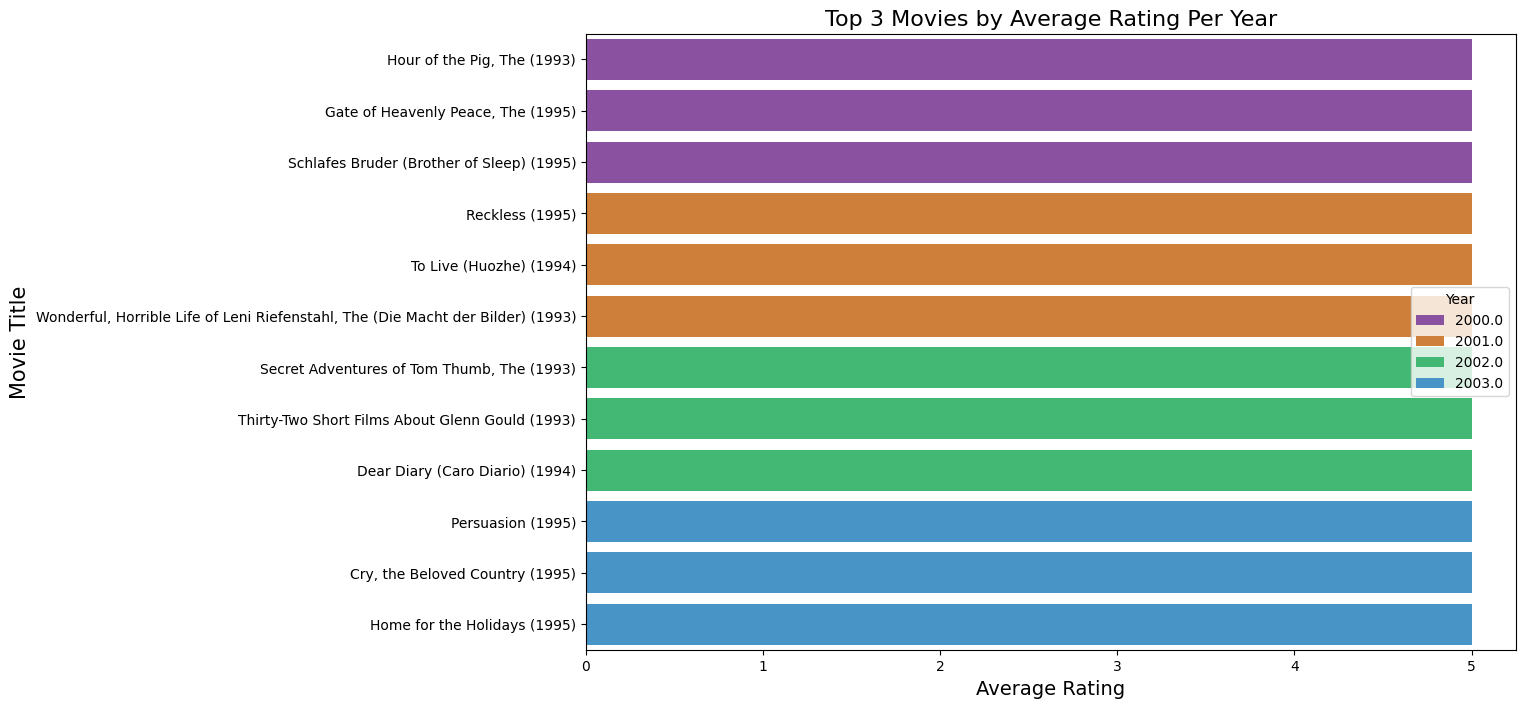

In [ ]:
custom_palette = {
    1995: '#FF5733',
    1996: '#33FF57',
    1997: '#3357FF',
    1998: '#FF33A1',
    1999: '#F1C40F',
    2000: '#8E44AD',
    2001: '#E67E22',
    2002: '#2ECC71',
    2003: '#3498DB',
    2004: '#D35400',
    2005: '#C0392B',
    2006: '#1ABC9C',
    2007: '#F39C12',
    2008: '#9B59B6',
    2009: '#34495E'
}
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='title', hue='year', data=top_3_movies_with_titles, palette=custom_palette)

plt.title('Top 3 Movies by Average Rating Per Year', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Movie Title', fontsize=15)
plt.legend(title='Year')
plt.show()

In [ ]:
# ratings_matrix = dt.pivot_table(index='userID', columns='movieID', values='rating')
dt.dropna(inplace=True)
print(dt.isnull().sum())

movieID        0
title          0
Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
userID         0
rating         0
timestamp      0
date           0
year           0
month          0
day            0
dtype: int64


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

genre_vectors = movies_encoded.drop(columns=['movieID','title']).values
cosine_sim_movies = cosine_similarity(genre_vectors)

ratings_matrix = ratings.pivot(index='userID', columns='movieID', values='rating').fillna(0)
cosine_sim_users = cosine_similarity(ratings_matrix)

In [ ]:
def hybrid_recommendations(user_id, movie_id, movies, ratings_matrix, cosine_sim_movies, cosine_sim_users, user_weight=0.5, item_weight=0.5, min_matching_genres=1):
    user_index = ratings_matrix.index.get_loc(user_id)
    movie_index = movies[movies['movieID'] == movie_id].index[0]

    user_scores = cosine_sim_users[user_index]
    item_scores = cosine_sim_movies[movie_index]

    rated_movies_indices = np.nonzero(ratings_matrix.loc[user_id].values)[0]

    combined_scores = (user_weight * user_scores[rated_movies_indices]) + (item_weight * item_scores[rated_movies_indices])

    recommended_indices = np.argsort(combined_scores)[::-1]

    input_movie_genres = movies.loc[movies['movieID'] == movie_id, 'genres'].values[0]

    recommended_movies = movies.iloc[rated_movies_indices[recommended_indices]]


    def genre_filter(movie_genres):
        common_genres = set(movie_genres).intersection(input_movie_genres)
        return len(common_genres) >= min_matching_genres

    recommended_movies = recommended_movies[recommended_movies['genres'].apply(genre_filter)]

    return recommended_movies['title'].head(10)


In [ ]:
user_id = 1
movie_id =1


recommended_movies = hybrid_recommendations(user_id, movie_id, movies, ratings_matrix, cosine_sim_movies, cosine_sim_users)


print(recommended_movies)

# 1877                      Marty (1955)
# 2415                 Tinseltown (1998)
# 1826          Can't Hardly Wait (1998)
# 68                       Friday (1995)
# 2929    Dreaming of Joseph Lees (1998)
# 745                         Kim (1950)
# 2558                  Endurance (1998)
# 354             Higher Learning (1995)
# 136             Neon Bible, The (1995)
# 3512              Human Traffic (1999)

0                     Toy Story (1995)
2557          Edge of Seventeen (1998)
47                   Pocahontas (1995)
1421                      Kolya (1996)
2483        My Boyfriend's Back (1993)
853                   Wife, The (1995)
581      Brady Bunch Movie, The (1995)
963     Something to Sing About (1937)
639               Happy Weekend (1996)
1838                      Mulan (1998)
Name: title, dtype: object


In [ ]:
title = movies[movies['movieID'] == 2571]['title'].values[0]
print(title)


Matrix, The (1999)


In [ ]:
title = movies[movies['title'].str.contains("inception", case=False, na=False)]
print(title['movieID'])


Series([], Name: movieID, dtype: float32)


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split


scaler = MinMaxScaler(feature_range=(1, 5))

svd = TruncatedSVD(n_components=100, random_state=42)
user_factors = svd.fit_transform(ratings_matrix)
movie_factors = svd.components_.T

predicted_ratings_matrix = np.dot(user_factors, movie_factors.T)

predicted_ratings_matrix = scaler.fit_transform(predicted_ratings_matrix)

def predict_rating(user_id, movie_id, ratings_matrix, predicted_ratings_matrix):
    user_idx = ratings_matrix.index.get_loc(user_id)
    movie_idx = ratings_matrix.columns.get_loc(movie_id)
    return predicted_ratings_matrix[user_idx, movie_idx]

user_i = 8
movie_i = 1
predicted_rating = predict_rating(user_i, movie_i, ratings_matrix, predicted_ratings_matrix)
print(f"Predicted rating for user {user_i} on movie {movie_i}: {predicted_rating:.2f}")


# non_zero_mask = ratings_matrix.values != 0

# actual_ratings = ratings_matrix[non_zero_mask]

# predicted_ratings = predicted_ratings_matrix[non_zero_mask]


# mae = mean_absolute_error(actual_ratings, predicted_ratings)
# rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

# print(f'Mean Absolute Error: {mae:.2f}')
# print(f'Root Mean Squared Error: {rmse:.2f}')


Predicted rating for user 8 on movie 1: 2.17


In [ ]:

user_ratings_count = ratings.groupby('userID')['rating'].count()
test_user_id = user_ratings_count[user_ratings_count > 10].sample(1).index[0]


user_high_rated_movies = ratings[(ratings['userID'] == test_user_id) & (ratings['rating'] >= 4)]
test_movie_id = user_high_rated_movies.sample(1)['movieID'].values[0]

print(f"Test user ID: {test_user_id}, Movie ID: {test_movie_id}")
recommended_movies = hybrid_recommendations(test_user_id, test_movie_id, movies, ratings_matrix, cosine_sim_movies, cosine_sim_users)
print(f"Recommended movies for user {test_user_id} based on movie {test_movie_id} they liked:")
print(recommended_movies)